# Homework 1 - Diagnostic

CAPP 30254 Machine Learning for Public Policy

Jonathan Tan

April 6, 2019

## Problem 1: Data Acquisition and Analysis

### 1. Download reported crime data from the Chicago open data portal for 2017 and 2018.

Given the large volume of crime data (over 500,000 rows), the data was downloaded via the Socrata Open Data API and stored in `/data/crime.csv`. The script to replicate this can be found in `/scripts/data-assembly.py`.

### 2. Generate summary statistics for the crime reports data including but not limited to number of crimes of each type, how they change over time, and how they are different by neighborhood. Please use a combination of tables and graphs to present these summary stats.

In [36]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
crime_df = pd.read_csv("data/crime.csv")
crime_df = crime_df.rename({'Unnamed: 0': 'index'}, axis='columns')

In [289]:
crime_df.head()

,index,arrest,beat,block,case_number,community_area,date,description,district,domestic,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,0,True,1034,026XX S CALIFORNIA BLVD,JA529032,30.0,2017-11-28T21:43:00.000,VIOLENT OFFENDER: ANNUAL REGISTRATION,10.0,False,...,41.843778,"{'type': 'Point', 'coordinates': [-87.69463767...",JAIL / LOCK-UP FACILITY,-87.694638,OTHER OFFENSE,2018-02-11T15:54:58.000,12.0,1158280.0,1886310.0,2017
1,1,True,1221,007XX N SACRAMENTO BLVD,JA545986,23.0,2017-12-11T19:15:00.000,ARMED: HANDGUN,12.0,False,...,41.894476,"{'type': 'Point', 'coordinates': [-87.70216915...",SIDEWALK,-87.702169,ROBBERY,2018-02-11T15:54:58.000,27.0,1156092.0,1904769.0,2017
2,2,False,2222,092XX S RACINE AVE,JB147188,73.0,2017-10-08T03:00:00.000,NON-AGGRAVATED,22.0,False,...,NaN,NaN,RESIDENCE,NaN,CRIM SEXUAL ASSAULT,2018-02-11T15:57:41.000,21.0,NaN,NaN,2017
3,3,False,835,026XX W 79TH ST,JB147595,70.0,2017-03-28T14:00:00.000,UNLAWFUL ENTRY,8.0,False,...,NaN,NaN,OTHER,NaN,BURGLARY,2018-02-11T15:57:41.000,18.0,NaN,NaN,2017
4,4,False,313,060XX S EBERHART AVE,JB147230,42.0,2017-09-09T20:17:00.000,OVER $500,3.0,False,...,NaN,NaN,RESIDENCE,NaN,THEFT,2018-02-11T15:57:41.000,20.0,NaN,NaN,2017


#### How often is each crime reported in the data?

The most-commonly reported category of crimes is "THEFT", while the least commonly reported category of crime is "NON-CRIMINAL (SUBJECT SPECIFIED)".

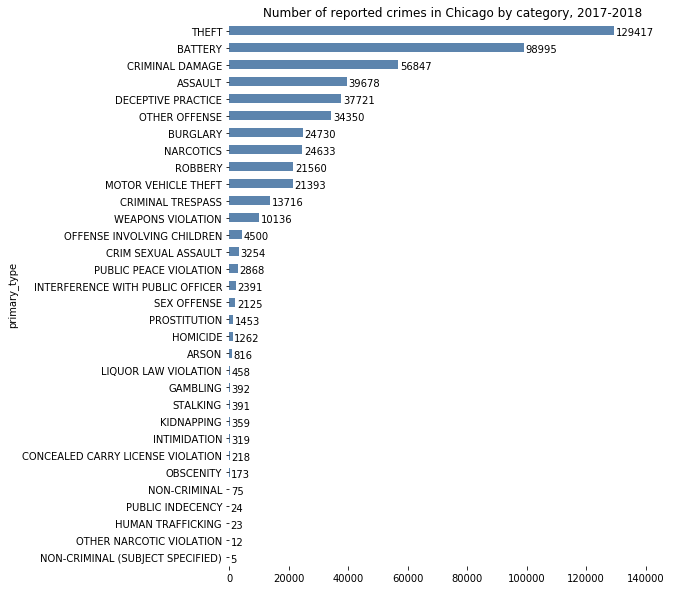

In [27]:
# Group by primary_type, count number of rows in each, then sort in ascending order
crime_by_type = crime_df \
    .groupby(['primary_type'])[['index']] \
    .count() \
    .rename({'index': 'count'}, axis='columns') \
    .sort_values(by='count')

# plot results
ax1 = crime_by_type.plot.barh(title='Number of reported crimes in Chicago by category, 2017-2018',
                             legend=False,
                             figsize=(8, 10),
                             xlim=(0, 150000),
                             color=(0.2, 0.4, 0.6, 0.8))

# add bar labels
# Code adapted from https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
for p in ax1.patches:
    ax1.annotate(str(p.get_width()),
                 (p.get_width() + 500, p.get_y()))

# remove border 
# Code adapted from https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
for edge in ('top', 'right', 'bottom', 'left'):
    ax1.spines[edge].set_visible(False)

#### How have reports for each crime changed between 2017 and 2018?

The total number of reported crimes stayed relatively stable between 2017 and 2018, falling slightly by 0.7%.

In [28]:
crime_df.groupby(['year']).size().pct_change()

year
2017        NaN
2018   -0.00702
dtype: float64

The category of crime that has seen the largest percentage increase between 2017 and 2018 is "CONCEALED CARRY LICENSE VIOLATION" (+116%), while the category that has seen the largest percentage decrease is "OTHER NARCOTIC VIOLATION" (-91%).

Additionally, reports of theft - the most common category of crime overall - stayed relatively stable and only increased by 1.1%. 

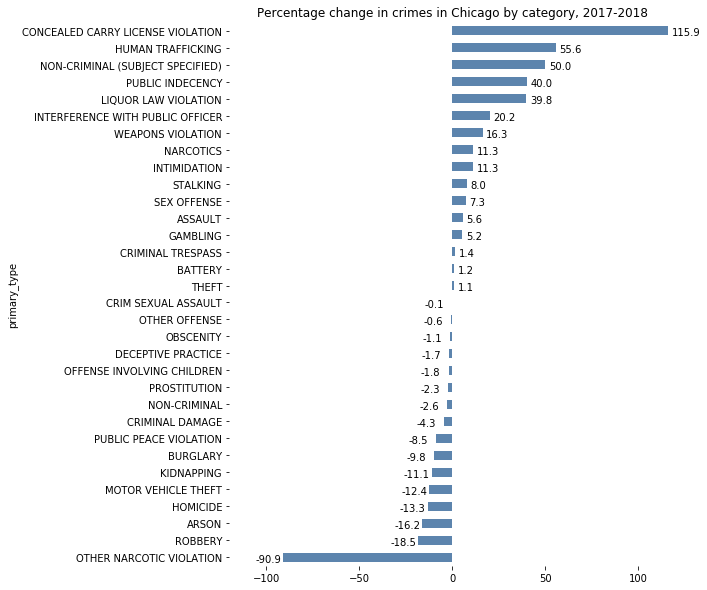

In [29]:
# Group by primary_type and year, count the number of rows in each type-year, 
#  calculate the percentage change from 2017 to 2018 for each year, 
pct_change_df = crime_df \
    .groupby(['primary_type', 'year'])[['index']] \
    .count() \
    .pct_change() \
    .reset_index()

# Filter to only show 2018 values, then sort by value
pct_change_df = pct_change_df \
    .loc[pct_change_df.year == 2018] \
    .sort_values(by='index') \
    .rename({'index': 'pct_change'}, axis='columns')

# Adjust units to show in percentage instead of decimal
pct_change_df['pct_change'] *= 100

# plot
ax2 = pct_change_df.plot.barh(x='primary_type',
                              y='pct_change',
                              title='Percentage change in crimes in Chicago by category, 2017-2018',
                              legend=False,
                              figsize=(8, 10), 
                              xlim=(-120, 120),
                              color=(0.2, 0.4, 0.6, 0.8))

# add bar labels
for p in ax2.patches:
    if p.get_width() > 0:
        ax2.annotate(str(round(p.get_width(), 1)),
                     (p.get_width() + 2, p.get_y()))
    else:
        ax2.annotate(str(round(p.get_width(), 1)),
                     (p.get_width() - 15, p.get_y()))
    
# remove border 
for edge in ('top', 'right', 'bottom', 'left'):
    ax2.spines[edge].set_visible(False)

#### How do crimes differ by neighborhood?

In [30]:
# Count number of reported crimes by community_area
crime_by_area = crime_df \
    .groupby(['community_area']) \
    .size() \
    .reset_index() \
    .rename({0: 'count'}, axis='columns')

# change ID for community_area from float to int to string for merging
crime_by_area.community_area = crime_by_area.community_area.astype(int).astype(str)
crime_by_area.sort_values(by='count', ascending=False).head()

,community_area,count
25,25,30424
8,8,25365
32,32,21479
28,28,18446
29,29,18373


There are 77 community areas in Chicago, so a table isn't particularly effective here at showing patterns (if any) by area. Instead, we'll get a basemap of Chicago from the Chicago Open Data Portal to plot our data against.

In [31]:
# First, get Chicago basemap
import requests
import geopandas as gpd
from geopandas.plotting import plot_dataframe
import descartes  # to plot polygons in geopandas
import shapely # to work directly with geometric objects

CHICAGO_URL = 'https://data.cityofchicago.org/resource/igwz-8jzy.geojson'
chicago_gjson = requests.get(CHICAGO_URL).json()
chicago_gdf = gpd.GeoDataFrame.from_features(chicago_gjson)

Next, we'll take the counts of reported crime from above and merge it onto the neighborhood data so we can plot it.

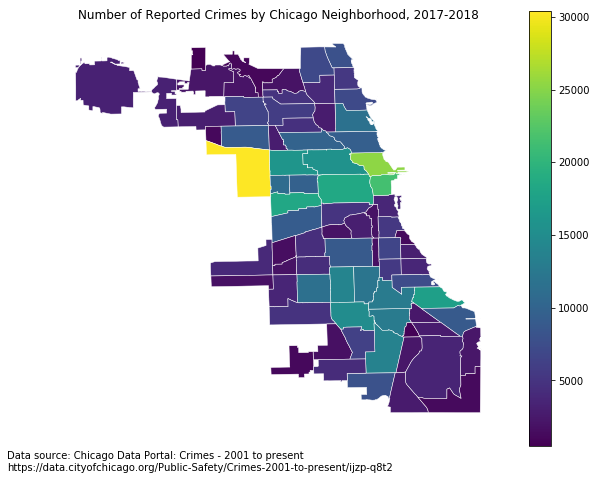

In [37]:
# Merge count of reported crime onto each community area
crime_gdf = chicago_gdf.merge(crime_by_area,
                              how='inner',
                              left_on='area_num_1', right_on='community_area')

# Plot the map
ax3 = crime_gdf.plot(edgecolor='white',
                     linewidth=0.5,
                     column='count', 
                     figsize=(10, 8),
                     legend=True)

# Some visual tweaks
plt.title('Number of Reported Crimes by Chicago Neighborhood, 2017-2018')
plt.axis('off')
plt.text(-88.01, 41.585, 
         "Data source: Chicago Data Portal: Crimes - 2001 to present \nhttps://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2")
plt.show()

From the map, we can tell that the total number of reported crimes between 2017 and 2018 was highest in Austin, followed by the Near North Side and the Loop. 

What about neighborhood patterns for specific kinds of crimes? In what neighborhood is each crime reported most often?

In [138]:
crimes_by_cat_df = crime_df \
    .groupby(['primary_type', 'community_area']) \
    .size() \
    .reset_index() \
    .rename({0: 'count'}, axis='columns')

# Code to filter by category with largest value adapted from
# https://stackoverflow.com/questions/32459325/python-pandas-dataframe-select-row-by-max-value-in-group/32459442
crimes_by_cat_df.loc[crimes_by_cat_df.groupby(['primary_type'])['count'].idxmax()] \
    .sort_values(by=['community_area', 'count'], ascending=[True, False])

,primary_type,community_area,count
1843,THEFT,8.0,12022
589,DECEPTIVE PRACTICE,8.0,3815
512,CRIMINAL TRESPASS,8.0,711
1002,LIQUOR LAW VIOLATION,8.0,48
1774,STALKING,8.0,28
862,INTIMIDATION,8.0,18
1523,PUBLIC INDECENCY,8.0,4
666,GAMBLING,23.0,56
1247,NON-CRIMINAL (SUBJECT SPECIFIED),23.0,2
254,BURGLARY,24.0,1151


It appears that Austin (community area 25) is the neighborhood with the most reports for most crimes, with the exception of:
- Near North Side (#8) for reports of theft, deceptive practice, criminal trespass, liquor law violation, stalking, intimidation, and public indecency
- Humbolt Park (#23) for gambling
- West Town (#24) for burglary
- North Lawndale (#29) for narcotics
- the Loop (#32) for other narcotic violations
- South Shore (#43) for obsenity
- O'Hare (#76) for concealed carry licence violations and other unspecified non-criminal activities.

We can further illustrate this by mapping out the frequency of reports of each crime by neighborhood:

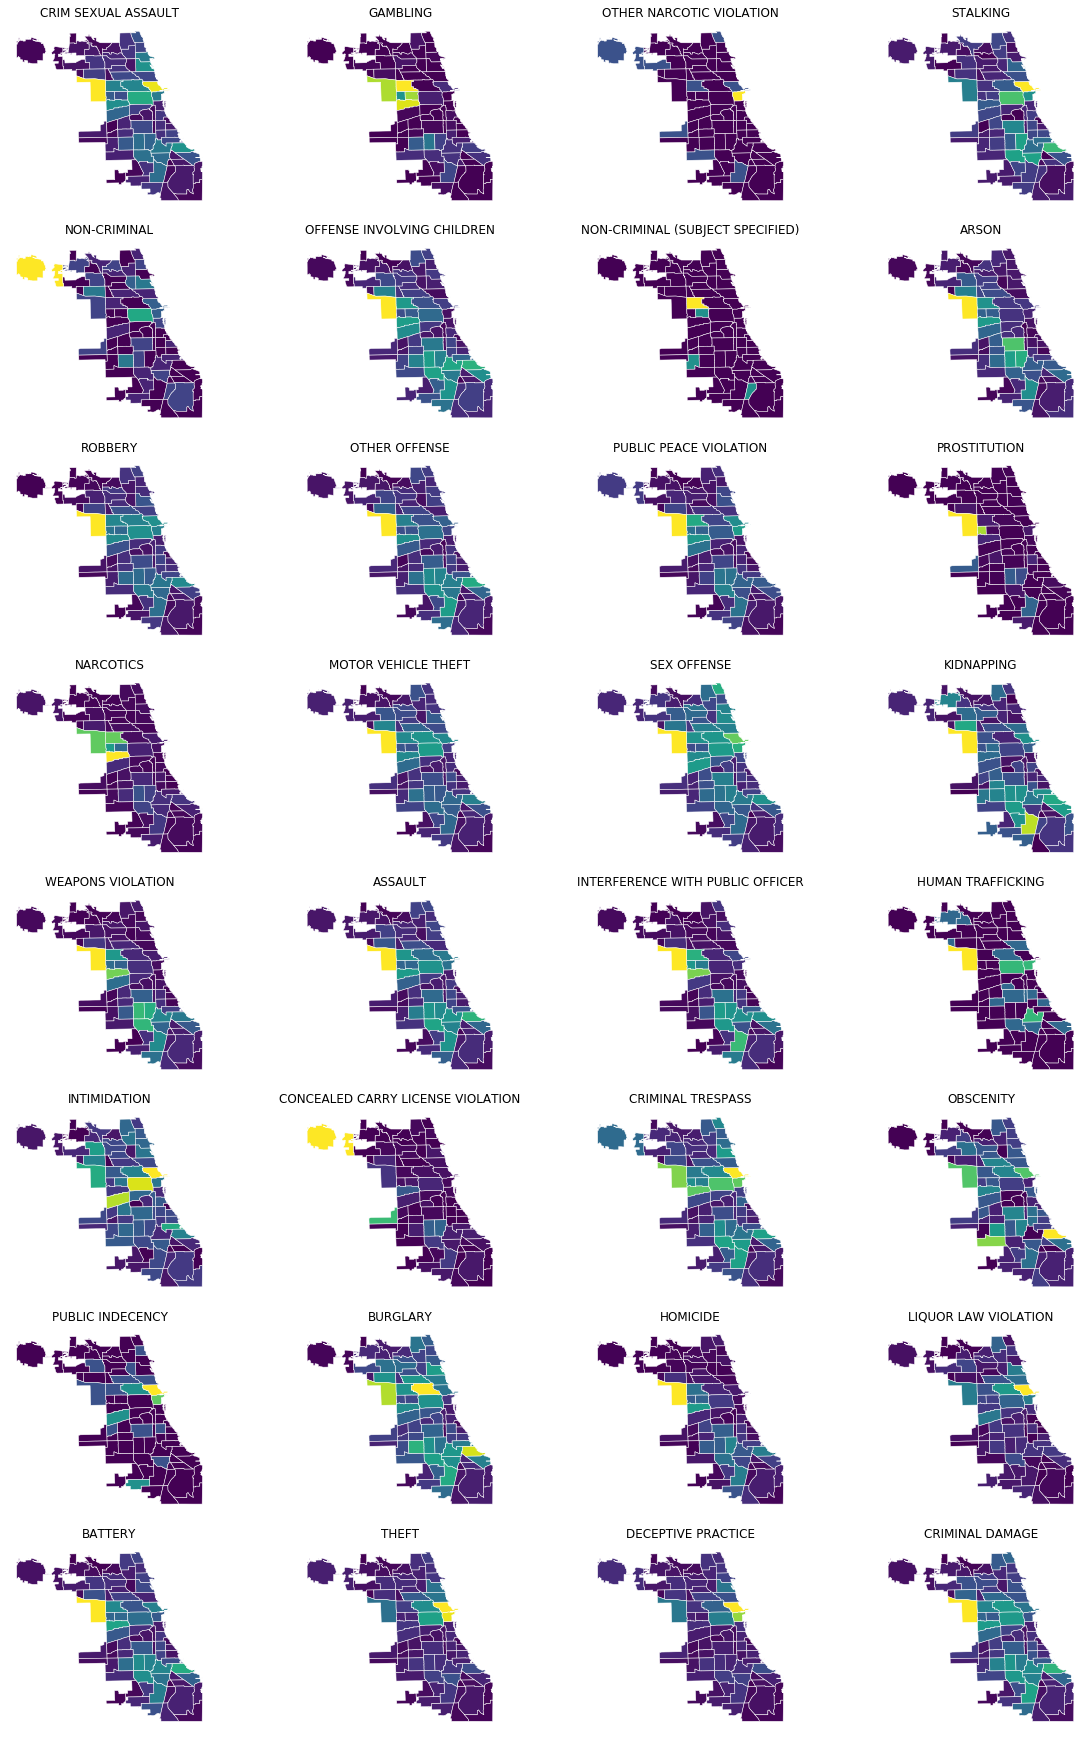

In [140]:
# Small multiples code adapted from https://joelotz.github.io/small-multiples-in-matplotlib.html
# Also looked at https://python-graph-gallery.com/125-small-multiples-for-line-chart/

# Reshape data to community_area-level
crimes_by_area_cat = crime_df \
    .groupby(['community_area', 'primary_type']) \
    .size() \
    .reset_index() \
    .pivot(index='community_area', columns='primary_type', values=0) \
    .reset_index() \
    .fillna(0)

# change ID for community_area from float to int to string for merging
crimes_by_area_cat.community_area = crimes_by_area_cat.community_area.astype(int).astype(str)

# merge and save as new GeoDataFrame
crime_by_cat_gdf = chicago_gdf.merge(crimes_by_area_cat,
                                     how='inner',
                                     left_on='area_num_1', right_on='community_area')

########################
# SMALL MULTIPLES PLOT #
########################

# Get unique list of categories and length 
categories = list(set(crime_df.primary_type))
num_plots = len(categories)

# Set up empty figure with 32 subplots for 32 crime categories
FIG_WIDTH, FIG_HEIGHT = 16, 24
NUM_ROWS, NUM_COLS = 8, 4
fig = plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
axes = [plt.subplot(NUM_ROWS, NUM_COLS, i) for i in range(1, num_plots + 1)]

# Tweak layout and spacing
plt.tight_layout(pad=0, w_pad=1, h_pad=1)
# plt.subplots_adjust(hspace=1)
# plt.rcParams['xtick.major.pad']='8'

for i in range(num_plots):
    # plot different category to each subplot
    ax = axes[i]
    plot_dataframe(crime_by_cat_gdf,
                   column=categories[i],
                   ax=ax,
                   edgecolor='white',
                   linewidth=0.5)
    
    # Remove top and right axes and ticks
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    
    # Display crime category
    ax.set_title(categories[i])

## Problem 2: Data Augmentation and APIs

Since we are dealing with highly granular data, I've chosen to use data from the Census 5-year estimates from 2017. The demographic data is available down to the block group level, while crime data is available at precise coordinates, so aggregating both at the block level should be an adequate compromise.

In [258]:
# define query to census API
# unique census key is stored in environmental variable 
CENSUS_URL = 'https://api.census.gov/data/2017/acs/acs5'
CENSUS_KEY = %env CENSUS_KEY
DATA_VARS = ['B02001_001E', 'B02001_002E', 'B02001_003E', 'B02001_005E', # race vars
             'B19013_001E',  # income var
             'B11016_001E', 'B11016_002E', 'B11016_009E'] # household size vars
QUERY_PARAMS = {
    'get': ','.join(DATA_VARS),
    'for': 'block group:*',
    'in': 'state:17+county:031+tract:*',
    'key': CENSUS_KEY
}

# Query
census_data = requests.get(CENSUS_URL, params=QUERY_PARAMS)

if not census_data:
    print(f"Query failed with status code {census_data.status_code}")
else:
    census_df = pd.DataFrame.from_records(census_data.json())
    
    # Use first row as headers
    census_df.columns = census_df.iloc[0]
    census_df = census_df[1:]
    
    # Rename columns from census codes
    census_df = census_df.rename({
        'B02001_001E': 'pop_total', 
        'B02001_002E': 'pop_white', 
        'B02001_003E': 'pop_black', 
        'B02001_005E': 'pop_asian', 
        'B19013_001E': 'hh_income', # median household income in last 12 months 
        'B11016_001E': 'hh_total',
        'B11016_002E': 'hh_family', 
        'B11016_009E': 'hh_nonfamily'
    }, axis='columns')
    
    # Combine state, county, tract, and block group IDs into GEOID
    census_df['geoid'] = census_df['state'] + census_df['county'] \
                         + census_df['tract'] + census_df['block group']

census_df.head()

,pop_total,pop_white,pop_black,pop_asian,hh_income,hh_total,hh_family,hh_nonfamily,state,county,tract,block group,geoid
1,600,11,589,0,21500,194,109,85,17,031,251900,1,170312519001
2,1546,78,1376,0,32143,402,272,130,17,031,251900,2,170312519002
3,1341,977,23,8,57000,448,313,135,17,031,821101,1,170318211011
4,1356,1023,48,55,65699,357,288,69,17,031,821101,3,170318211013
5,616,616,0,0,97656,269,173,96,17,031,821101,2,170318211012


In [ ]:
# FCC has an API for converting lat/long to Census Block FIPS 
# https://geo.fcc.gov/api/census/

# Write a function to map to all crimes
def get_block_fips(series):
    '''
    Input: latitude, longitude
    Output: 15 digit census block FIPS code string
    '''
    
    # Set query parameters
    FCC_URL = 'https://geo.fcc.gov/api/census/block/find'
    FCC_PARAMS = {
        'latitude': series.latitude,
        'longitude': series.longitude,
        'showall': 'false',
        'format': 'json'
    }

    # Make query and return FIPS string
    fcc_json = requests.get(FCC_URL, params=FCC_PARAMS).json()
    
    if fcc_json['status'] == 'error':
        return None
    else:
        return fcc_json['Block']['FIPS']

    
# Apply function
crime_df['block_fips'] = crime_df.apply(get_block_fips, axis=1)
crime_df['block_group_fips'] = crime_df['block_fips'][0:12]

In [ ]:
crime_df